#### Import libraries

In [1]:
#This package provides a number of re-sampling techniques commonly used in datasets showing strong between-class imbalance.
!pip install imbalanced-learn

In [2]:
# Install the latest versions of the scikit-learn and imbalanced-learn packages.
# This will ensure that you have the most up-to-date features and bug fixes.
!pip install -U scikit-learn imbalanced-learn

In [3]:
#Install the latest versions of scikit-learn and threadpoolctl.
#This will ensure that you have the most up-to-date features and bug fixes.
!pip install -U scikit-learn threadpoolctl

In [4]:
# Disable Jedi autocompletion.
%config Completer.use_jedi=False

# Import the pandas library.
import pandas as pd

# Import the seaborn library
import seaborn as sns

# Import the numpy library.
import numpy as np

# Import the matplotlib library.
import matplotlib.pyplot as plt

# Import the tensorflow library.
import tensorflow as tf

# Import the time library.
import time

# Import the warnings library.
import warnings

# Ignore warnings.
warnings.filterwarnings('ignore')

# Import the necessary metrics from sklearn for evaluation purposes
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

#### Load the dataset

In [5]:
# Read the 'dermatology.csv' file into a pandas DataFrame.
df = pd.read_csv('dermatology.csv')

#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description: In this part, a row of labels was added to the original data and cleaned by removing the data's null values. The data was then normalized to make sure the information in the data was consistent. Lastly, the data was split into several sets to be used when building the model.

##### Label Encoding

In [6]:
# Display the first 5 rows of the DataFrame.
df.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [7]:
# Create a list of column names for labelling the columns
column_names = ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'Age (linear)', 'Result']

# Assign the list of column names to the `columns` attribute of the DataFrame
df.columns = column_names


In [8]:
df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Result
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


##### Data Cleaning

In [9]:
# Print the shape of the DataFrame
df.shape

(365, 35)

In [10]:
#Check the number of null in the dataset
null_counts = df.apply(lambda x: sum(x == '?'), axis=0)
print(null_counts)


erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [11]:
# Replace '?' with actual NaN values
df.replace('?', pd.NA, inplace=True)

# Get the columns with null values
columns_with_null = null_counts[null_counts > 0].index.tolist()

# Remove rows with null values
df.dropna(subset=columns_with_null, inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

In [12]:
# Count the number of `?` values in each column
df.apply(lambda x: sum(x == '?'), axis=0)

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [13]:
# Check the new shape of the data
df.shape

(357, 35)

##### Normalization

In [14]:
# Calculate descriptive statistics for each column and transpose the result
description = df.describe().transpose()

# Display the complete description
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(description)

                                          count      mean       std  min  25%  \
erythema                                  357.0  2.078431  0.665785  0.0  2.0   
scaling                                   357.0  1.806723  0.702451  0.0  1.0   
definite borders                          357.0  1.574230  0.898318  0.0  1.0   
itching                                   357.0  1.350140  1.133296  0.0  0.0   
koebner phenomenon                        357.0  0.638655  0.909356  0.0  0.0   
polygonal papules                         357.0  0.450980  0.957513  0.0  0.0   
follicular papules                        357.0  0.170868  0.577132  0.0  0.0   
oral mucosal involvement                  357.0  0.380952  0.838321  0.0  0.0   
knee and elbow involvement                357.0  0.621849  0.991466  0.0  0.0   
scalp involvement                         357.0  0.532213  0.913198  0.0  0.0   
family history                            357.0  0.123249  0.329185  0.0  0.0   
melanin incontinence        

In [15]:
# Import the MinMaxScaler class for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_normalization = scaler.fit_transform(df)

X_normalization

array([[1.        , 1.        , 1.        , ..., 0.        , 0.10666667,
        0.        ],
       [0.66666667, 0.33333333, 0.66666667, ..., 1.        , 0.34666667,
        0.4       ],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.        , 0.53333333,
        0.        ],
       ...,
       [1.        , 0.66666667, 0.66666667, ..., 1.        , 0.37333333,
        0.4       ],
       [0.66666667, 0.33333333, 1.        , ..., 1.        , 0.66666667,
        0.4       ],
       [1.        , 0.66666667, 0.66666667, ..., 0.        , 0.46666667,
        0.        ]])

In [16]:
# Import the StandardScaler class for feature scaling
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the data
z_score_standardization = scaler.fit_transform(df)

z_score_standardization

array([[ 1.38612659,  1.70111735,  1.58938378, ..., -0.50580259,
        -1.84690329, -1.11981751],
       [-0.11796822, -1.15005116,  0.47462934, ...,  2.2027703 ,
        -0.66985276,  0.13536256],
       [-0.11796822,  0.27553309,  0.47462934, ..., -0.50580259,
         0.24563099, -1.11981751],
       ...,
       [ 1.38612659,  0.27553309,  0.47462934, ...,  2.2027703 ,
        -0.53906936,  0.13536256],
       [-0.11796822, -1.15005116,  1.58938378, ...,  2.2027703 ,
         0.89954796,  0.13536256],
       [ 1.38612659,  0.27553309,  0.47462934, ..., -0.50580259,
        -0.08132749, -1.11981751]])

#### Split the dataset
Split the dataset into training, validation and test sets.

In [17]:
# Extract the response & feature variable 
response = df.columns[-1]
X = df.drop([response], axis = 1)
Y = df[response]

In [18]:
# library that splits arrays or matrices into random subsets for train and test data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [19]:
# Split the X_train and Y_train datasets into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 5)

In [20]:
# display the overall shape for each dataset
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(357, 34)
(228, 34)
(72, 34)
(57, 34)


In [21]:
# Recheck the updated 
X_train.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
259,2,2,1,1,0,0,2,0,0,0,...,0,0,0,2,0,1,2,2,0,8
294,2,1,2,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,34
116,2,2,2,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,46
135,2,2,1,2,2,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,20
25,1,1,0,1,0,0,3,0,1,0,...,1,0,0,1,0,2,2,1,0,10


## Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description: In this part, features were filtered and chosen to enhance predictive model performance. 

In [22]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [23]:
# Import the mutual_info_classif function for feature selection based on mutual information

from sklearn.feature_selection import mutual_info_classif

# Define a function to calculate mutual information scores
# by calculating the mutual information scores, then create a series of MI scores and sort in descending order
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_classif(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Perform feature selection with MI score
mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores

clubbing of the rete ridges                 0.573651
elongation of the rete ridges               0.533586
band-like infiltrate                        0.499405
saw-tooth appearance of retes               0.482783
thinning of the suprapapillary epidermis    0.464930
melanin incontinence                        0.450779
exocytosis                                  0.439806
polygonal papules                           0.435237
focal hypergranulosis                       0.427140
vacuolisation and damage of basal layer     0.419655
spongiosis                                  0.416186
knee and elbow involvement                  0.410474
oral mucosal involvement                    0.391403
fibrosis of the papillary dermis            0.354568
scalp involvement                           0.327357
munro microabcess                           0.309063
disappearance of the granular layer         0.280597
PNL infiltrate                              0.270168
definite borders                            0.

In [24]:
# Getting the top 10, 20, 30 features based on the highest MI score
top_10_features = mi_scores.head(10).index.tolist()
top_20_features = mi_scores.head(20).index.tolist()
top_30_features = mi_scores.head(30).index.tolist()

In [25]:
# Creating a new dataframe with 10, 20, 30 features
X_10_features = df[top_10_features]
X_20_features = df[top_20_features]
X_30_features = df[top_30_features]

##### Modelling with 10 features

In [26]:
# Split the data into training and testing sets for the top 10 features
X_train_10, X_test_10, Y_train_10, Y_test_10 = train_test_split(X_10_features, Y, test_size = 0.2, random_state = 5)

In [27]:
# Split the X_train_10 and Y_train_10 datasets into training and validation sets
X_train_10, X_val_10, Y_train_10, Y_val_10 = train_test_split(X_train_10, Y_train_10, test_size = 0.2, random_state = 5)

In [28]:
# Import the SMOTE class from the imblearn.over_sampling module
from imblearn.over_sampling import SMOTE

# Create SMOTE insstance & apply SMOTE reseampling to training data
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_10, Y_train_10)

In [29]:
# Import the RandomForestClassifier class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Fitting a RandomForestClassifier model to the training data
model = RandomForestClassifier()
model.fit(X_train_10, Y_train_10)

RandomForestClassifier()

In [30]:
# Import the classification_report function from the sklearn.metrics module
from sklearn.metrics import classification_report

# Import the cross_val_predict function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_predict

# Perform crosee-validated predictions 
predict = cross_val_predict(estimator = model, X = X_train_10, y = Y_train_10, cv = 5)
print("Classification Report: \n", classification_report(Y_train_10, predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97        73
           2       0.46      0.65      0.54        40
           3       1.00      1.00      1.00        49
           4       0.33      0.21      0.26        28
           5       0.80      0.86      0.83        28
           6       0.50      0.10      0.17        10

    accuracy                           0.78       228
   macro avg       0.68      0.63      0.63       228
weighted avg       0.77      0.78      0.76       228



In [31]:
# Make predictions on the test data
Y_pred_10 = model.predict(X_test_10)

# Generate the classification report
report = classification_report(Y_test_10, Y_pred_10)
print(report)

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       0.43      0.27      0.33        11
           3       0.91      1.00      0.95        10
           4       0.47      0.62      0.53        13
           5       0.81      0.93      0.87        14
           6       0.00      0.00      0.00         5

    accuracy                           0.74        72
   macro avg       0.59      0.64      0.61        72
weighted avg       0.67      0.74      0.70        72



##### Modelling with 20 features

In [32]:
# Split the data into training and testing sets for the top 20 features
X_train_20, X_test_20, Y_train_20, Y_test_20 = train_test_split(X_20_features, Y, test_size = 0.2, random_state = 5)

In [33]:
#?
X_train_20, X_val_20, Y_train_20, Y_val_20 = train_test_split(X_train_20, Y_train_20, test_size = 0.2, random_state = 5)

In [34]:
# Apply SMOTE to balance the training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_20, Y_train_20)

In [35]:
# Train the model using the training data
model.fit(X_train_20, Y_train_20)

RandomForestClassifier()

In [36]:
# Train the model using the training data
predict = cross_val_predict(estimator = model, X = X_train_20, y = Y_train_20, cv = 5)
print("Classification Report: \n", classification_report(Y_train_20, predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      1.00      0.99        73
           2       0.84      0.95      0.89        40
           3       1.00      1.00      1.00        49
           4       0.96      0.89      0.93        28
           5       1.00      1.00      1.00        28
           6       1.00      0.50      0.67        10

    accuracy                           0.96       228
   macro avg       0.96      0.89      0.91       228
weighted avg       0.96      0.96      0.95       228



In [37]:
# Make predictions on the test data
Y_pred_20 = model.predict(X_val_20)

# Generate the classification report
report = classification_report(Y_val_20, Y_pred_20)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



##### Modelling with 30 features

In [38]:
# Split the data into training and testing sets for the top 20 features
X_train_30, X_test_30, Y_train_30, Y_test_30 = train_test_split(X_30_features, Y, test_size = 0.2, random_state = 5)

In [39]:
#?
X_train_30, X_val_30, Y_train_30, Y_val_30 = train_test_split(X_train_30, Y_train_30, test_size = 0.2, random_state = 5)

In [40]:
# Apply SMOTE to balance the training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_30, Y_train_30)

In [41]:
# Train the model using the training data
model.fit(X_train_30, Y_train_30)

RandomForestClassifier()

In [42]:
# Train the model using the training data
predict = cross_val_predict(estimator = model, X = X_train_30, y = Y_train_30, cv = 5)
print("Classification Report: \n", classification_report(Y_train_30, predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99        73
           2       0.90      0.95      0.93        40
           3       1.00      1.00      1.00        49
           4       0.96      0.86      0.91        28
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        10

    accuracy                           0.97       228
   macro avg       0.98      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



In [43]:
# Make predictions on the test data
Y_pred_30 = model.predict(X_test_30)

# Generate the classification report
report = classification_report(Y_test_30, Y_pred_30)
print(report)

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       0.85      1.00      0.92        11
           3       1.00      1.00      1.00        10
           4       1.00      0.85      0.92        13
           5       1.00      1.00      1.00        14
           6       1.00      0.80      0.89         5

    accuracy                           0.96        72
   macro avg       0.97      0.94      0.95        72
weighted avg       0.96      0.96      0.96        72



##### Modelling with All features

In [44]:
# Apply SMOTE to balance the training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [45]:
# Train the model using the training data
model.fit(X_train, Y_train)

RandomForestClassifier()

In [46]:
# Perform cross-validation and generate a classification report
predict = cross_val_predict(estimator = model, X = X_train, y = Y_train, cv = 5)
print("Classification Report: \n", classification_report(Y_train, predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99        73
           2       0.88      0.93      0.90        40
           3       1.00      1.00      1.00        49
           4       0.92      0.82      0.87        28
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        10

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



In [47]:
# Make predictions on the test data
Y_pred = model.predict(X_val)

# Generate the classification report
report = classification_report(Y_val, Y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



##### Information Gain

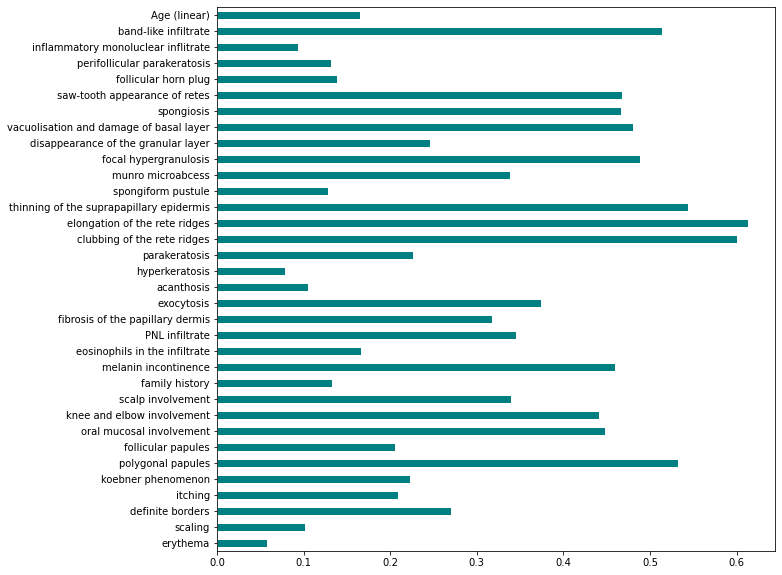

In [48]:
# Compute the feature importances using mutual information
importances = mutual_info_classif(X_train,Y_train)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 10)) 
feat_importances.plot(kind='barh', color='teal', edgecolor='white')  
plt.show()

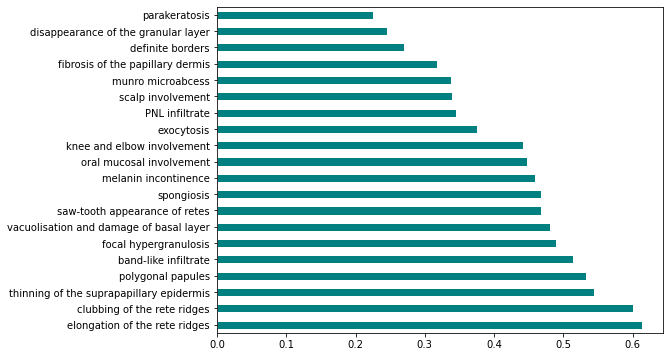

In [49]:
# Create a figure from the selected top 20 features 
# Plot the top 20 features as a horizontal bar chart

k = 20 
top_k_features = feat_importances.nlargest(k)

plt.figure(figsize=(8, 6))
top_k_features.plot(kind='barh', color='teal', edgecolor='white')
plt.show()

In [50]:
# Check top 20 features
top_20_features

['clubbing of the rete ridges',
 'elongation of the rete ridges',
 'band-like infiltrate',
 'saw-tooth appearance of retes',
 'thinning of the suprapapillary epidermis',
 'melanin incontinence',
 'exocytosis',
 'polygonal papules',
 'focal hypergranulosis',
 'vacuolisation and damage of basal layer',
 'spongiosis',
 'knee and elbow involvement',
 'oral mucosal involvement',
 'fibrosis of the papillary dermis',
 'scalp involvement',
 'munro microabcess',
 'disappearance of the granular layer',
 'PNL infiltrate',
 'definite borders',
 'koebner phenomenon']

#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description: In this part, Support Vector Machine (SVM) and K-Nearest Neighbour (KNN) were used as the predictive model. Data were fed into them so they can learn and make predictions by using existing data. The performance was compared with the result from Hyperparameter Tuning models..

##### Support Vector Machine (SVM)

In [51]:
# import library for SVM 
from sklearn.svm import SVC

# Create an Instance of SVM with a linear kernel & fit the model to the training data
C = 0.1
svm = SVC(kernel='linear', C=C)
svm.fit(X_train_20, Y_train_20)

SVC(C=0.1, kernel='linear')

In [52]:
# predict validation data
Y_pred_svm = svm.predict(X_val_20)

#Print Result
print('accuracy score: ', accuracy_score(Y_val_20, Y_pred_svm))
print('precision score: ', precision_score(Y_val_20, Y_pred_svm, average='weighted'))
print('recall score: ', recall_score(Y_val_20, Y_pred_svm, average='weighted'))
print('f1 score: ', f1_score(Y_val_20, Y_pred_svm, average='weighted'))


accuracy score:  0.9649122807017544
precision score:  0.9668615984405459
recall score:  0.9649122807017544
f1 score:  0.9651911973893398


##### Hyperparameter Tuning for SVM

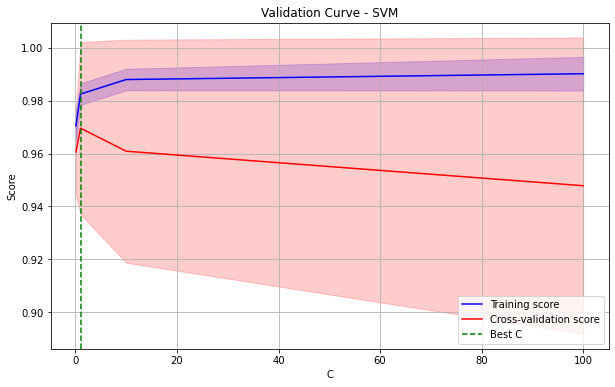

Best C value: 1


In [53]:
# import library for generating validation curves
from sklearn.model_selection import validation_curve

# import library for performing an exhaustive search over specified hyperparameter values for an estimator (a machine learning model).
from sklearn.model_selection import GridSearchCV

# Define the range of C values to test
param_range = [0.1, 1, 10, 100]

# Create the SVM classifier
svm = SVC(kernel='linear')

# Compute validation curve
train_scores, test_scores = validation_curve(svm, X_train_20, Y_train_20, param_name='C', param_range=param_range, cv=5)

# Calculate mean and standard deviation for training and test scores
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)
std_test_scores = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, mean_train_scores, label='Training score', color='b')
plt.plot(param_range, mean_test_scores, label='Cross-validation score', color='r')

# Plot the shaded area showing the variance
plt.fill_between(param_range, mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha=0.2, color='b')
plt.fill_between(param_range, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.2, color='r')

# Perform grid search on the training data
grid_search = GridSearchCV(svm, param_grid={'C': param_range})
grid_search.fit(X_train_20, Y_train_20)

# Get the best C value
best_C = grid_search.best_params_['C']

# Highlight the best C value
plt.axvline(x=best_C, color='g', linestyle='--', label='Best C')

# Add labels and title
plt.xlabel('C')
plt.ylabel('Score')
plt.title('Validation Curve - SVM')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

# Print the best C value
print("Best C value:", best_C)

In [54]:
# Create an Instance of SVM with a linear kernel & fit the model to the training data
C = best_C
svm_HT = SVC(kernel='linear', C=C)
svm_HT.fit(X_train_20, Y_train_20)

SVC(C=1, kernel='linear')

In [55]:
#Predict validation data 
Y_pred_svm_HT = svm_HT.predict(X_val_20)

#Print result
print('accuracy score: ', accuracy_score(Y_val_20, Y_pred_svm_HT))
print('precision score: ', precision_score(Y_val_20, Y_pred_svm_HT, average='weighted'))
print('recall score: ', recall_score(Y_val_20, Y_pred_svm_HT, average='weighted'))
print('f1 score: ', f1_score(Y_val_20, Y_pred_svm_HT, average='weighted'))

accuracy score:  0.9649122807017544
precision score:  0.9668615984405459
recall score:  0.9649122807017544
f1 score:  0.9651911973893398


##### K-Nearest Neighbour (KNN)

In [56]:
# import library for KNN
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier & fit the model to the training data
# Get the accuracy score on the test data 
scores = []
max_score = 0
best_k = 0
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_20, Y_train_20)
    score = knn.score(X_val_20, Y_val_20)
    if score > max_score:
        max_score = score
        best_k = k
    scores.append(score)

In [57]:
#Testing accuracy for each value of K
scores

[0.9824561403508771,
 0.9473684210526315,
 0.9649122807017544,
 0.9298245614035088,
 0.9649122807017544,
 0.9122807017543859,
 0.9473684210526315,
 0.9298245614035088,
 0.9473684210526315,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9473684210526315]

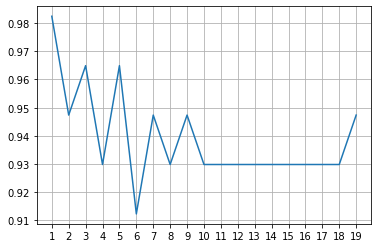

Max Score:  0.9824561403508771
Best K:  1


In [58]:
# Plot the scores & find the maximum scoree and its corresponding index
plt.plot(np.arange(1,20), scores)
plt.xticks(np.arange(1,20))
plt.grid()
plt.show()
print('Max Score: ', max(scores))
print ('Best K: ',best_k)

In [59]:
#Predict validation data
Y_pred_knn = knn.predict(X_val_20)

#Print Results
print('accuracy score: ', accuracy_score(Y_val_20, Y_pred_knn))
print('precision score: ', precision_score(Y_val_20, Y_pred_knn, average='weighted'))
print('recall score: ', recall_score(Y_val_20, Y_pred_knn, average='weighted'))
print('f1 score: ', f1_score(Y_val_20, Y_pred_knn, average='weighted'))

accuracy score:  0.9473684210526315
precision score:  0.9617224880382775
recall score:  0.9473684210526315
f1 score:  0.9402453502176493


##### Hyperparameter Tuning For KNN

In [60]:
#
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for random search
param_grid = {'n_neighbors': np.arange(1, 20)}

# Create the KNN classifier
knnc = KNeighborsClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(knnc, param_distributions=param_grid, n_iter=10)

# Perform random search on the training data
random_search.fit(X_train_20, Y_train_20)

# Get the best hyperparameters
best_k = random_search.best_params_['n_neighbors']

# Fit the KNN classifier with the best hyperparameters
knn_HT = KNeighborsClassifier(n_neighbors=best_k)
knn_HT.fit(X_train_20, Y_train_20)

# Calculate the score on the test set
score = knn_HT.score(X_val_20, Y_val_20)

print("Best k value:", best_k)
print("Test set score:", score)

Best k value: 3
Test set score: 0.9649122807017544


In [61]:
#Predict validation data
Y_pred_knn_HT = knn_HT.predict(X_val_20)

#Print Results
print('accuracy score: ', accuracy_score(Y_val_20, Y_pred_knn_HT))
print('precision score: ', precision_score(Y_val_20, Y_pred_knn_HT, average='weighted'))
print('recall score: ', recall_score(Y_val_20, Y_pred_knn_HT, average='weighted'))
print('f1 score: ', f1_score(Y_val_20, Y_pred_knn_HT, average='weighted'))

accuracy score:  0.9649122807017544
precision score:  0.9719298245614035
recall score:  0.9649122807017544
f1 score:  0.9652121757384915


#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description: For SVM, we used the model without hyperparameter tuning because the results were the same with or without it. For KNN we show the result for both (with and without hyperparameter tuning) models since it have different results.

#####  Accuracy, Recall, Precision and F1-score 

In [62]:
# Create an empty dictionary named 'results' to store the results or performance metrics
results = {}

In [63]:
# Calculate the evaluation metrics and store results for SVM model 
# Indicators: accuracy, weighted precision, weighted recall, weighted f1 score 
svm.fit(X_train_20, Y_train_20)

#Predict test data
Y_pred_svm = svm.predict(X_test_20)

#Store results
results['Support Vector Machines'] = [accuracy_score(Y_test_20, Y_pred_svm),
                                  precision_score(Y_test_20, Y_pred_svm, average='weighted'),
                                  recall_score(Y_test_20, Y_pred_svm, average='weighted'),
                                  f1_score(Y_test_20, Y_pred_svm, average='weighted')
                                  ]

In [64]:
# Calculate the evaluation metrics and store results for KNN model 
# Indicators: accuracy, weighted precision, weighted recall, weighted f1 score 
knn.fit(X_train_20, Y_train_20)

#Predict test data
Y_pred_knn = knn.predict(X_test_20)

#Store results
results['K-Nearest Neighbours'] = [accuracy_score(Y_test_20, Y_pred_knn),
                                  precision_score(Y_test_20, Y_pred_knn, average='weighted'),
                                  recall_score(Y_test_20, Y_pred_knn, average='weighted'),
                                  f1_score(Y_test_20, Y_pred_knn, average='weighted')
                                  ]

In [65]:
# Calculate the evaluation metrics and store results for KNN model 
# Indicators: accuracy, weighted precision, weighted recall, weighted f1 score 
knn_HT.fit(X_train_20, Y_train_20)

#Predict test data
Y_pred_knn_HT = knn_HT.predict(X_test_20)

#Store results
results['K-Nearest Neighbours (with HyperParameter Tuning)'] = [accuracy_score(Y_test_20, Y_pred_knn_HT),
                                  precision_score(Y_test_20, Y_pred_knn_HT, average='weighted'),
                                  recall_score(Y_test_20, Y_pred_knn_HT, average='weighted'),
                                  f1_score(Y_test_20, Y_pred_knn_HT, average='weighted')
                                  ]

In [66]:
# Create a DataFrame from the results dictionary with 'results' as the data
# to determine the accuracy, precision, recall, f1 score
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

df_results

,Accuracy,Precision,Recall,F1-Score
Support Vector Machines,0.972222,0.976496,0.972222,0.972222
K-Nearest Neighbours,0.916667,0.946078,0.916667,0.905919
K-Nearest Neighbours (with HyperParameter Tuning),0.958333,0.967262,0.958333,0.958116


As for the result, Support Vector Machine is the best predictive model in predicting dermatology dataset. K-Nearest Neighbour with hyperparameter tuning comes second before K-Nearest Neighbour without hyperparameter tuning.

##### Confusion Matrix

##### SVM

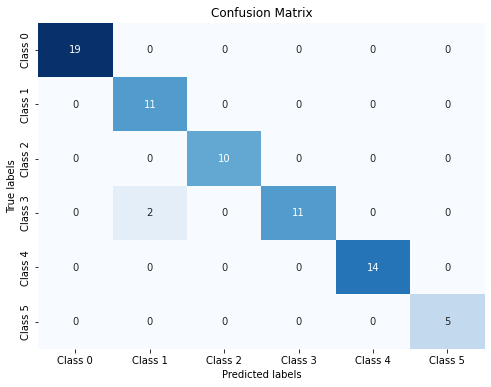

In [67]:
# Assuming Y_test_10 and Y_pred_10 contain the true labels and predicted labels, respectively
cm = confusion_matrix(Y_test_20, Y_pred_svm)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2','Class 3', 'Class 4', 'Class 5'])  
ax.yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2','Class 3', 'Class 4', 'Class 5'])  

# Display the plot
plt.show()

The first row represents the instances that are actually in the first class. In this case, there are 19 instances. The remaining values in this row are zeros because none of the instances in the first class were misclassified as belonging to any other class. The second row corresponds to the instances actually belonging to the second class. There are 11 instances in this class, and all of them were correctly classified. The third row represents the instances in the third class. All 10 instances in this class were classified correctly. The fourth row corresponds to the instances actually belonging to the fourth class. There are 13 instances in this class, but 2 of them were misclassified as belonging to the second class. The fifth row represents the instances in the fifth class. All 14 instances in this class were correctly classified. The sixth row corresponds to the instances actually belonging to the sixth class. There are 5 instances in this class, and all of them were classified correctly.

##### KNN

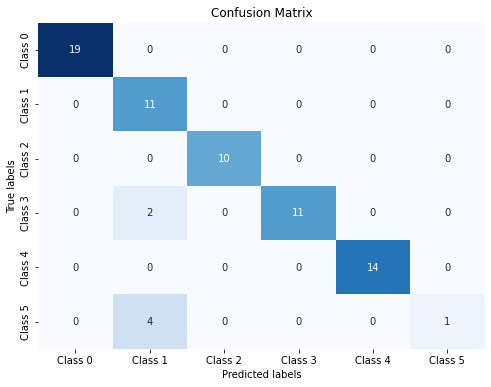

In [68]:
# Assuming Y_test_10 and Y_pred_10 contain the true labels and predicted labels, respectively
cm = confusion_matrix(Y_test_20, Y_pred_knn)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2','Class 3', 'Class 4', 'Class 5'])  
ax.yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2','Class 3', 'Class 4', 'Class 5'])  

# Display the plot
plt.show()

The first row corresponds to the instances that are truly in the first class. Out of the 19 instances, all of them were classified correctly, as there are no misclassifications in this row. The second row represents the instances truly belonging to the second class. There are 11 instances, and all of them were classified correctly. The third row corresponds to the instances truly belonging to the third class. All 10 instances were correctly classified. The fourth row represents the instances truly belonging to the fourth class. Out of the 13 instances, 2 were misclassified as belonging to the second class. The remaining 10 instances were classified correctly. The fifth row corresponds to the instances truly belonging to the fifth class. All 14 instances were correctly classified. The sixth row represents the instances truly belonging to the sixth class. Out of the 5 instances, 4 were misclassified. These two instances were classified as belonging to the second class.